# Mobile Price Classification

Bay Aman kendi cep telefonu şirketini kurmak istiyor ve Samsung ve Apple gibi büyük akıllı telefon markalarıyla zorlu bir mücadeleye girmek istiyor. Ancak hem pazarlama hem de üretim maliyetlerini karşılayabilecek bir cep telefonunun fiyatını nasıl tahmin edeceğini bilmiyor. Bu nedenle bu görevde cep telefonlarının gerçek fiyatlarını tahmin etmek zorunda değilsiniz ancak cep telefonlarının fiyat aralığını tahmin etmeniz gerekiyor.

<img src="https://www.gorefurbo.com/cdn/shop/collections/Refurbished_Mobile_Phones_1.jpg?v=1695978895">

0 (düşük maliyetli)<br>
1 (orta maliyet)<br>
2 (yüksek maliyet)<br>
4 (çok yüksek maliyet)

<a href="https://thecleverprogrammer.com/2021/03/05/mobile-price-classification-with-machine-learning/">Dataya Buradan Erişebilirisniz</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mobile_prices.csv")

### EDA

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

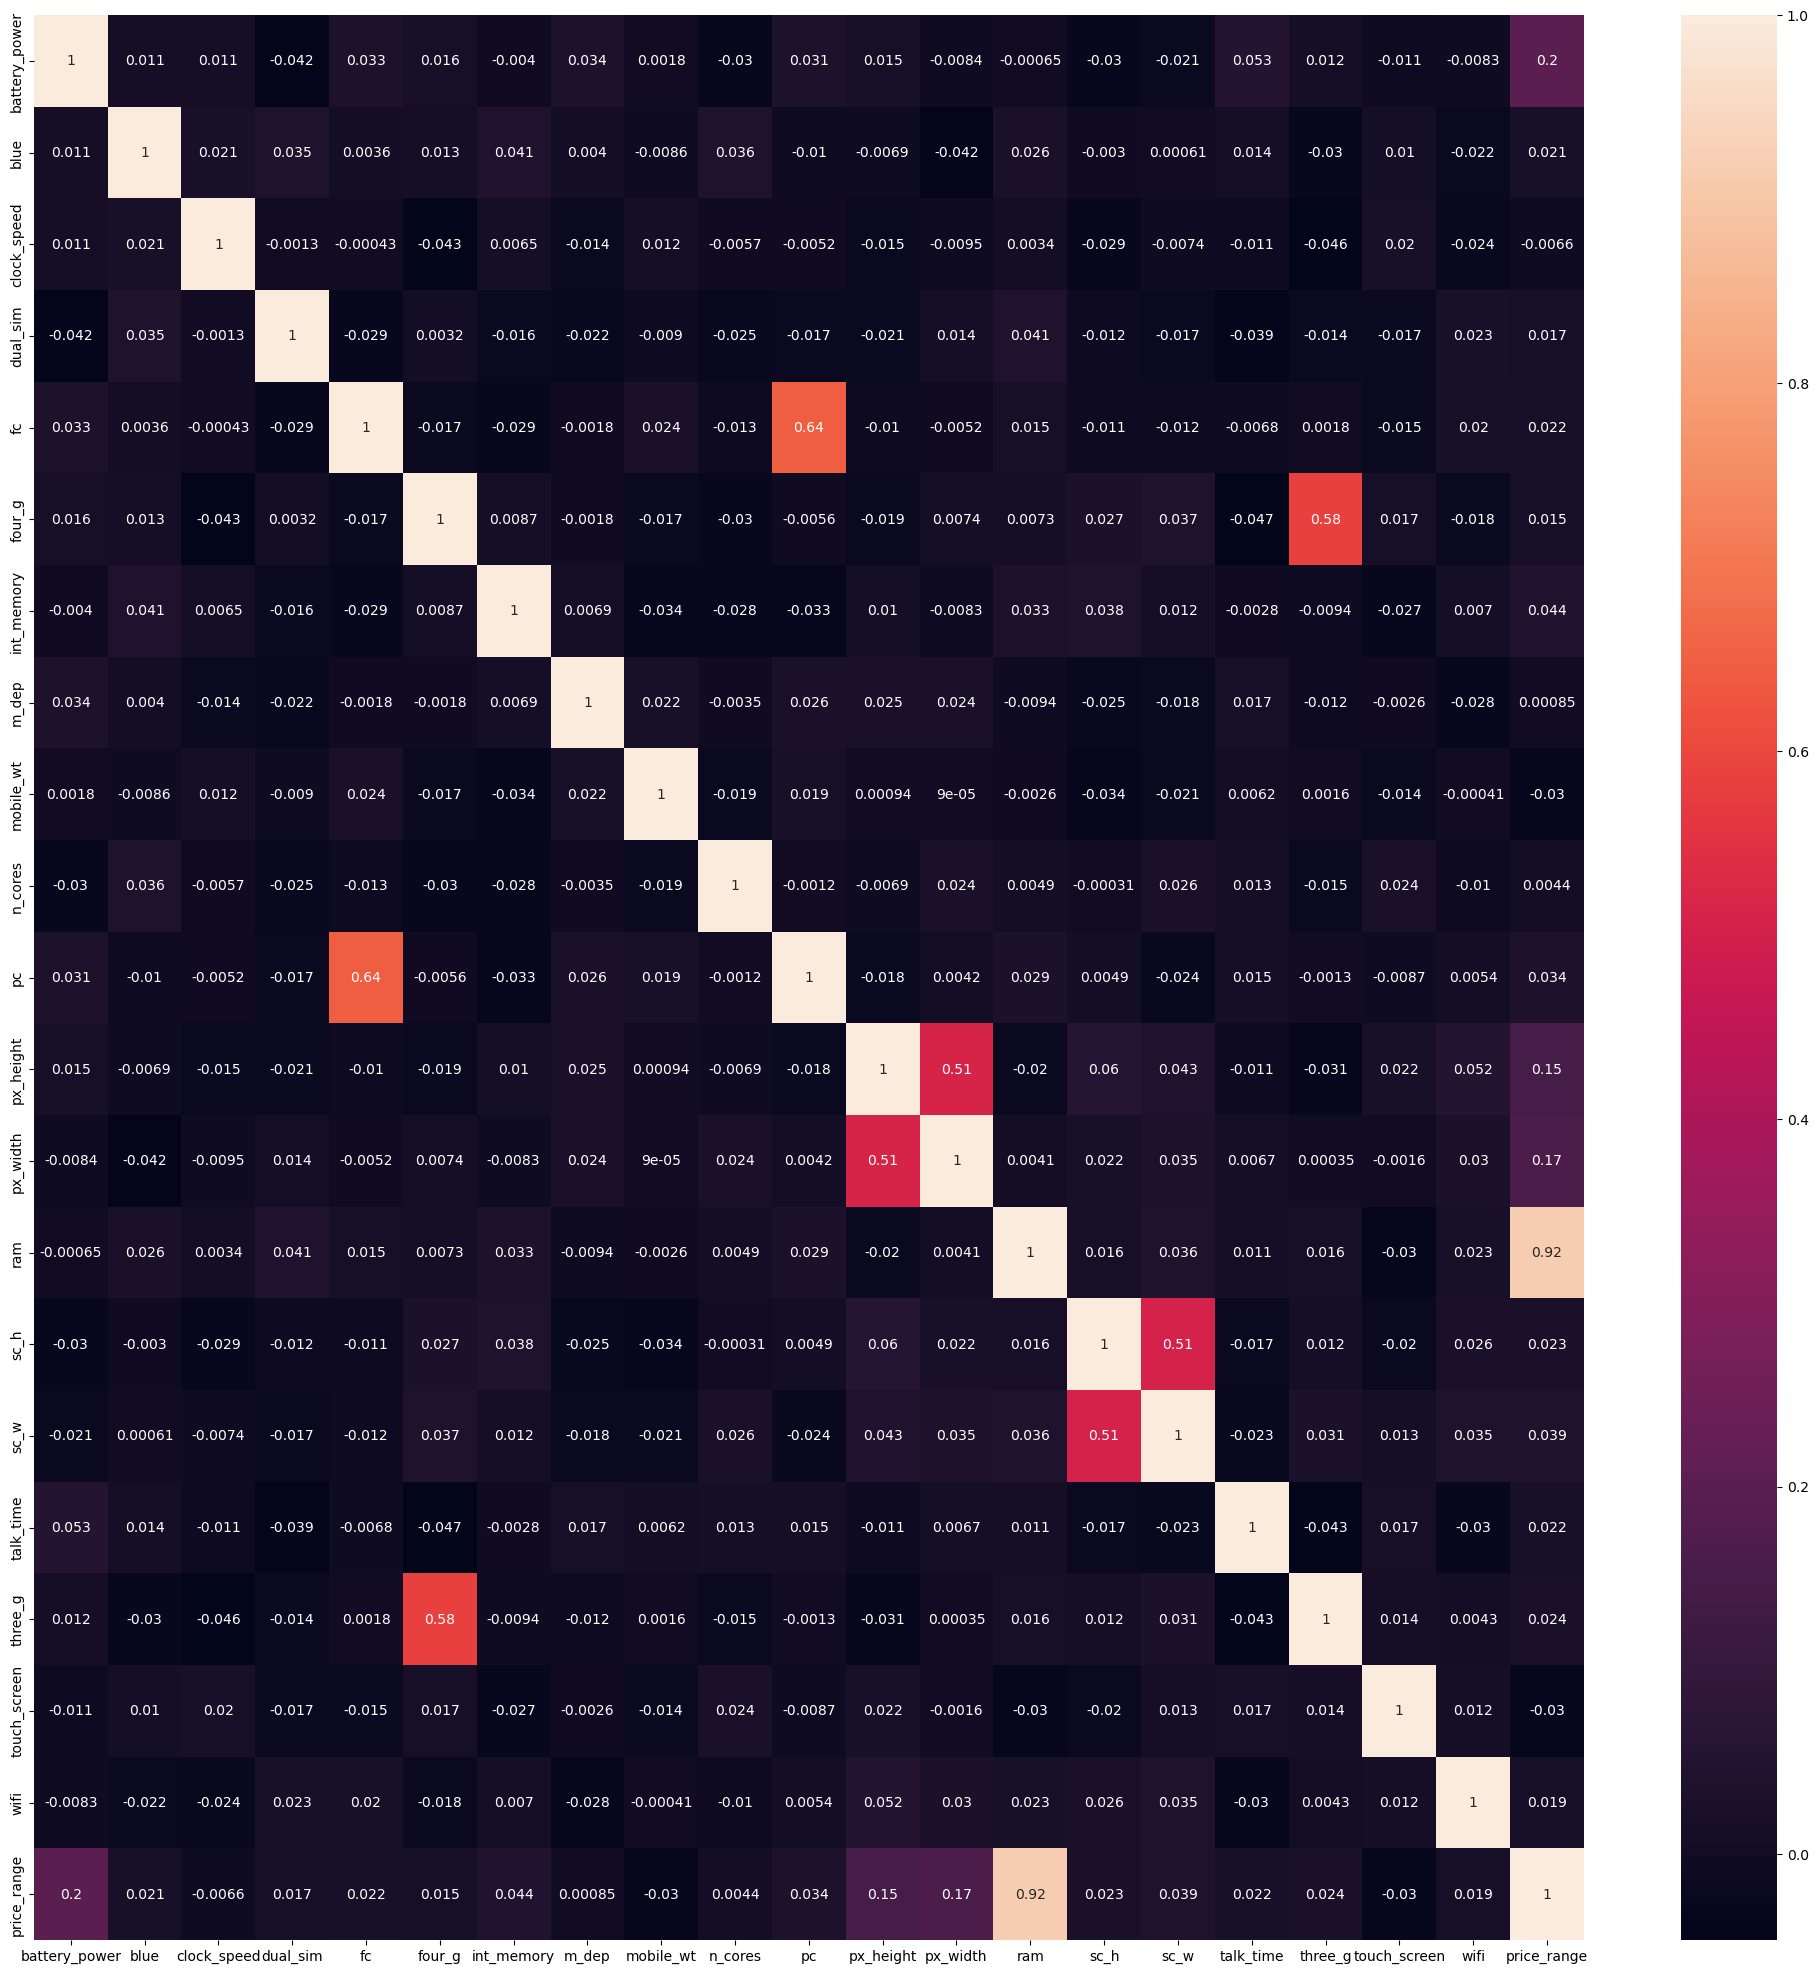

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr() ,annot=True)

### Modelling

In [9]:
x=df[["battery_power","px_height","px_width","ram"]]
y=df["price_range"]
# Deep Learning için veri ayırıyoruz
xd=df[["battery_power","px_height","px_width","ram"]]
yd=df["price_range"]

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='macro'))
        recall.append(recall_score(y_test, y_pred, average='macro'))
        f1.append(f1_score(y_test, y_pred, average='macro'))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [11]:
algo_test_classification(x,y)

C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
Logistic Regression,0.9725,0.971728,0.972723,0.972077
SVC,0.9675,0.966071,0.968258,0.966762
KNN,0.9450,0.942829,0.943623,0.943162
Random Forest,0.9350,0.933168,0.934486,0.933414
XGBoost,0.9350,0.933640,0.935159,0.933886
Gradient Boosting,0.9075,0.905947,0.907238,0.905989
Decision Tree,0.8550,0.854633,0.852873,0.852308
MLP,0.4550,0.543423,0.462691,0.461225


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [16]:
l.fit(x_train,y_train)

C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
tahmin=l.predict(x_test)

In [18]:
accuracy_score(tahmin,y_test)

0.9725

In [19]:
confusion_matrix(tahmin,y_test)

array([[103,   0,   0,   0],
       [  2,  91,   2,   0],
       [  0,   0,  87,   4],
       [  0,   0,   3, 108]], dtype=int64)

<Axes: >

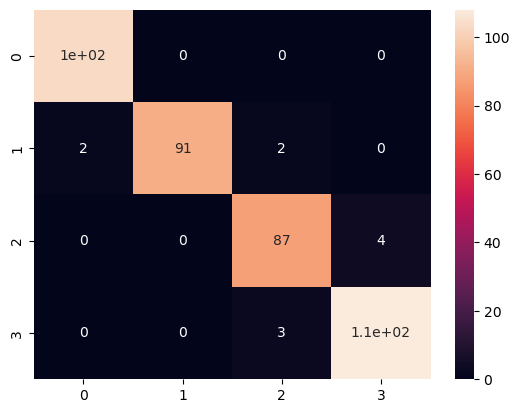

In [20]:
sns.heatmap(confusion_matrix(tahmin,y_test),annot=True)

In [21]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.96      0.98        95
           2       0.95      0.96      0.95        91
           3       0.96      0.97      0.97       111

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [22]:
x_test.head()

,battery_power,px_height,px_width,ram
1860,1646,211,1608,686
353,1182,275,986,2563
1333,1972,293,952,1316
905,989,256,1394,3892
1289,615,1021,1958,1906


In [23]:
l.predict(x_test.iloc[:5])  # İlk 5 satırı tahmin et

array([0, 2, 1, 3, 1], dtype=int64)

In [24]:
model=l.fit(x,y)

C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
import pickle

In [26]:
pickle.dump(model,open("fiyat.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(4,activation="softmax")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam : Gradient Descend -> sonuca 
                                                                                                                         #  yaklaştıkça adımları küçültüyor                        

In [38]:
from sklearn.preprocessing import normalize, scale

In [39]:
xd=scale(xd)

In [40]:
history=model.fit(xd,yd,epochs=300,batch_size=23, validation_split=.20, verbose=1) # epochs: Nöronlar areasında kaç kere dolaşacağını göstryr
                                                                             # batc_size: Veriler  büyük olduğu için veriyi eşit parçalara bölüyor
                                                                             # validation_split=.20: Verilerin 80% i eğitim 20% test için ayırıyor 
                                                                             # verbose : Aşağıda yazılar çıkıyor, bize hangi basamakta olduğumuzu söylüyor

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5221 - loss: 1.2183 - val_accuracy: 0.8575 - val_loss: 0.3635
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8913 - loss: 0.2965 - val_accuracy: 0.8725 - val_loss: 0.2863
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9103 - loss: 0.2081 - val_accuracy: 0.8800 - val_loss: 0.2578
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9298 - loss: 0.1725 - val_accuracy: 0.9000 - val_loss: 0.2248
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9369 - loss: 0.1570 - val_accuracy: 0.8975 - val_loss: 0.1806
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9402 - loss: 0.1396 - val_accuracy: 0.9275 - val_loss: 0.1697
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.9446 - loss: 0.1420 - val_accuracy: 0.9225 - val_loss: 0.1727
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.1566 - val_accuracy: 0.89

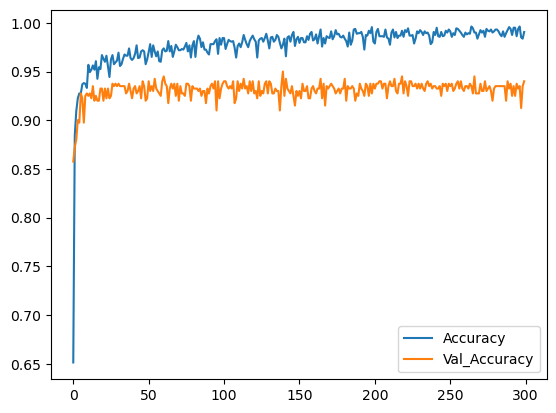

In [41]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak LogistikRegressiın da 97% Accuracy score elde ettik. Ve modelimizi bir streamlit uygulaması olusturmak üzere kaydettik. Ayrıca Deep Learningde de 99% Accuracy score elde ettik